In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score


In [15]:
df = pd.read_csv("/content/quikr_car.csv")
df.head()


,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [16]:
df = df.dropna()

df = df[df['Price'] != 'Ask For Price']
df['Price'] = df['Price'].str.replace(',', '').astype(int)

df['kms_driven'] = df['kms_driven'].str.replace(' kms', '').str.replace(',', '')
df['kms_driven'] = df['kms_driven'].astype(int)

df['year'] = df['year'].astype(int)


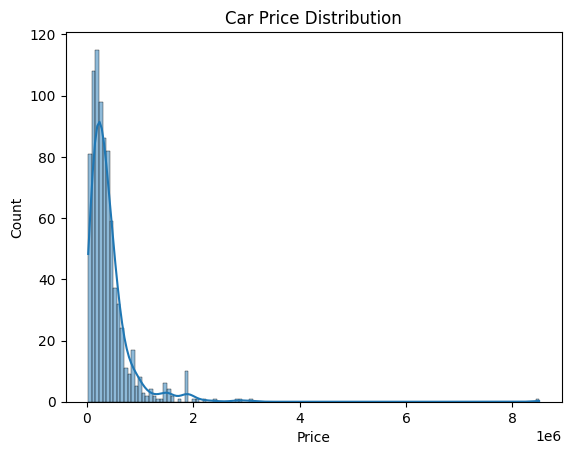

In [17]:
plt.figure()
sns.histplot(df['Price'], kde=True)
plt.title("Car Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


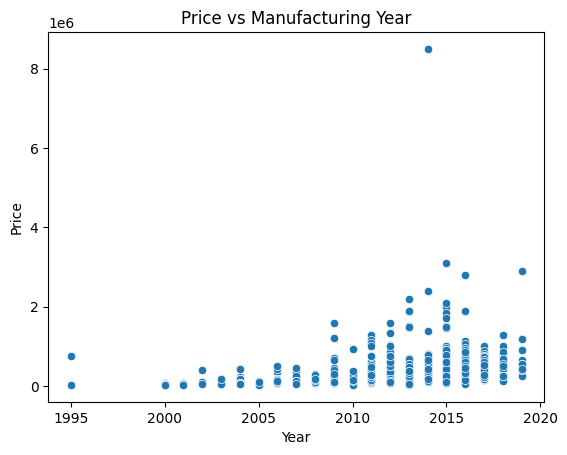

In [18]:
plt.figure()
sns.scatterplot(x=df['year'], y=df['Price'])
plt.title("Price vs Manufacturing Year")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()


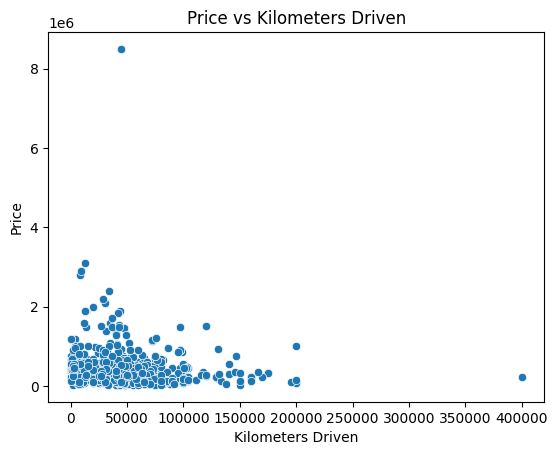

In [19]:
plt.figure()
sns.scatterplot(x=df['kms_driven'], y=df['Price'])
plt.title("Price vs Kilometers Driven")
plt.xlabel("Kilometers Driven")
plt.ylabel("Price")
plt.show()


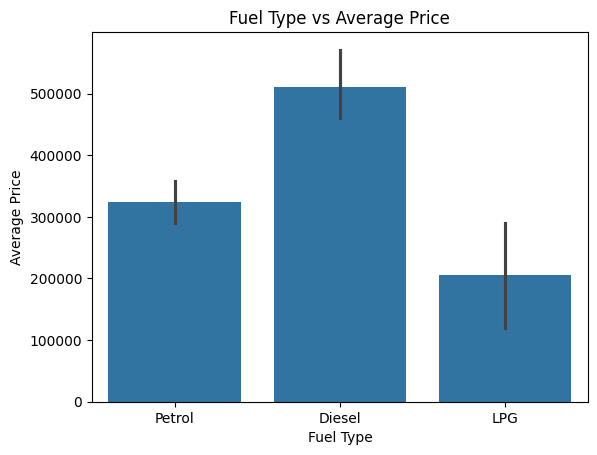

In [20]:
plt.figure()
sns.barplot(x=df['fuel_type'], y=df['Price'])
plt.title("Fuel Type vs Average Price")
plt.xlabel("Fuel Type")
plt.ylabel("Average Price")
plt.show()


In [21]:

X = df[['name', 'company', 'year', 'kms_driven', 'fuel_type']]
y = df['Price']


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [23]:
ohe = OneHotEncoder(handle_unknown='ignore')

column_transformer = ColumnTransformer(
    [('onehot', ohe, ['name', 'company', 'fuel_type'])],
    remainder='passthrough'
)

model = LinearRegression()

pipe = Pipeline([
    ('preprocessing', column_transformer),
    ('model', model)
])

pipe.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('model', LinearRegression())])

In [24]:
y_pred = pipe.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))


R2 Score: 0.1899542870155545


In [25]:
pipe.predict(pd.DataFrame([[
    'Hyundai i20',
    'Hyundai',
    2019,
    30000,
    'Petrol'
]], columns=X.columns))


array([483231.92911095])